In [3]:
import pandas as pd

In [7]:
#Upload CSV as dataframe
df = pd.read_csv("/content/NFL.csv")
df.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


In [8]:
df.columns

Index(['Year', 'Player', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone',
       'Shuttle', 'Drafted..tm.rnd.yr.', 'BMI', 'Player_Type', 'Position_Type',
       'Position', 'Drafted'],
      dtype='object')

In [9]:
# Drop unimportant columns
df = df.drop(columns = ['Year', 'Player', 'Drafted..tm.rnd.yr.'])

df.head()

,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Player_Type,Position_Type,Position,Drafted
0,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,31.004194,offense,backs_receivers,RB,Yes
1,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,33.510073,defense,defensive_lineman,DE,Yes
2,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,41.005821,offense,offensive_lineman,OG,Yes
3,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,28.312463,defense,defensive_back,FS,Yes
4,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,31.327425,defense,line_backer,OLB,Yes


In [10]:
# review null values
df.isna().sum()

,0
Age,550
School,0
Height,0
Weight,0
Sprint_40yd,174
Vertical_Jump,697
Bench_Press_Reps,905
Broad_Jump,728
Agility_3cone,1217
Shuttle,1140


In [11]:
# Drop null values
df = df.dropna()
df.isna().sum()

,0
Age,0
School,0
Height,0
Weight,0
Sprint_40yd,0
Vertical_Jump,0
Bench_Press_Reps,0
Broad_Jump,0
Agility_3cone,0
Shuttle,0


In [12]:
# Get unique values in the 'Position' column
unique_positions = df['Position'].unique()

# Print the unique values
print(unique_positions)

['DE' 'FS' 'OLB' 'OT' 'CB' 'SS' 'TE' 'RB' 'C' 'FB' 'DT' 'OG' 'WR' 'ILB'
 'QB' 'S' 'LS']


In [13]:
# rename df
df_filtered = df

In [14]:

#Count the occurrences of each school
school_counts = df_filtered['School'].value_counts()

# Identify schools that appear more than 5 times
schools_to_keep = school_counts[school_counts > 5].index

# Replace schools that appear 5 or fewer times with "Other"
# Source Chat GPT (01/27/2025)
df_filtered['School'] = df_filtered['School'].apply(lambda x: x if x in schools_to_keep else 'Other')

# Check the updated DataFrame
print(df_filtered['School'].value_counts())


School
Other             218
Clemson            35
LSU                34
Ohio St.           33
Oklahoma           32
                 ... 
SMU                 7
Kansas St.          7
Washington St.      7
Utah St.            6
Rice                6
Name: count, Length: 84, dtype: int64


In [15]:
#Encode non-numerical columns
df_encoded = pd.get_dummies(df_filtered, columns=['School', 'Player_Type', 'Position_Type', 'Position'])
df_encoded

,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,...,Position_LS,Position_OG,Position_OLB,Position_OT,Position_QB,Position_RB,Position_S,Position_SS,Position_TE,Position_WR
1,22.0,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,33.510073,...,False,False,False,False,False,False,False,False,False,False
3,23.0,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,28.312463,...,False,False,False,False,False,False,False,False,False,False
4,22.0,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,31.327425,...,False,False,True,False,False,False,False,False,False,False
7,21.0,2.0320,140.160042,5.32,55.88,19.0,238.76,7.87,4.88,33.945078,...,False,False,False,True,False,False,False,False,False,False
8,23.0,1.8796,120.655570,4.53,88.90,28.0,304.80,7.46,4.43,34.152029,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,23.0,1.8542,86.636143,4.60,91.44,9.0,307.34,6.70,4.15,25.199154,...,False,False,False,False,False,False,False,False,False,False
3429,22.0,1.9304,109.315761,5.00,87.63,16.0,299.72,7.56,4.55,29.335140,...,True,False,False,False,False,False,False,False,False,False
3434,22.0,1.9558,102.965468,4.45,93.98,8.0,312.42,7.25,4.59,26.917995,...,False,False,False,False,False,False,False,False,False,True
3439,21.0,1.8034,86.182550,4.64,85.09,16.0,294.64,6.89,4.09,26.499349,...,False,False,False,False,False,False,True,False,False,False


In [16]:
# Encode 'Drafted' column
df_encoded['Drafted'] = df_encoded['Drafted'].map({'Yes': 1, 'No': 0})
df_encoded.head()

,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,...,Position_LS,Position_OG,Position_OLB,Position_OT,Position_QB,Position_RB,Position_S,Position_SS,Position_TE,Position_WR
1,22.0,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,33.510073,...,False,False,False,False,False,False,False,False,False,False
3,23.0,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,28.312463,...,False,False,False,False,False,False,False,False,False,False
4,22.0,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,31.327425,...,False,False,True,False,False,False,False,False,False,False
7,21.0,2.0320,140.160042,5.32,55.88,19.0,238.76,7.87,4.88,33.945078,...,False,False,False,True,False,False,False,False,False,False
8,23.0,1.8796,120.655570,4.53,88.90,28.0,304.80,7.46,4.43,34.152029,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Split our preprocessed data into our features and target arrays
y = df_encoded["Drafted"]
X = df_encoded.drop(columns='Drafted')


In [18]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
input_nodes_1 = 15
input_nodes_2 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units= input_nodes_1, input_dim= number_input_features, activation= 'relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= input_nodes_2, activation= 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid'))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 15)                  │           1,815 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,071 (8.09 KB)

 Trainable params: 2,071 (8.09 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the Model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [22]:
# fit the model
fit_model = nn.fit(X_train_scaled, y_train, epochs= 10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7570 - loss: 0.5672
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7979 - loss: 0.5173
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7901 - loss: 0.4982
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8066 - loss: 0.4555
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7838 - loss: 0.4746
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8228 - loss: 0.4140
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8162 - loss: 0.4111
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7967 - loss: 0.4327
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8184 - loss: 0.3965
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8192 - loss: 0.3935


In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 1s - 81ms/step - accuracy: 0.7733 - loss: 0.5325
Loss: 0.5325442552566528, Accuracy: 0.7733333110809326


In [35]:
# Save Epoch Data for Graph
history = nn.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6082 - loss: 0.6730 - val_accuracy: 0.7653 - val_loss: 0.5565
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7788 - loss: 0.5236 - val_accuracy: 0.7813 - val_loss: 0.5334
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7956 - loss: 0.5032 - val_accuracy: 0.7787 - val_loss: 0.5252
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 0.4758 - val_accuracy: 0.7787 - val_loss: 0.5229
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7654 - loss: 0.4952 - val_accuracy: 0.7813 - val_loss: 0.5198
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7984 - loss: 0.4464 - val_accuracy: 0.7840 - val_loss: 0.5169
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7939 - loss: 0.4396 - val_accuracy: 0.7840 - val_loss: 0.5168
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8036 - loss: 0.4175 - val_accuracy: 0.7813 - val_loss

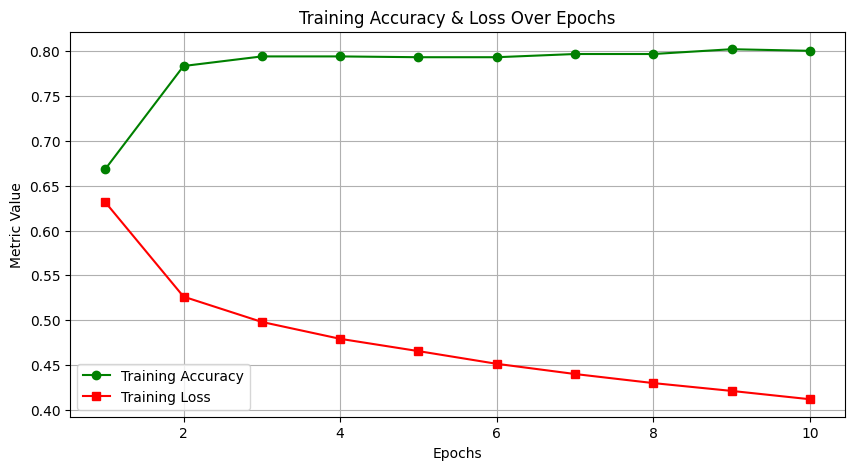

In [36]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values
train_loss = history.history["loss"]
train_acc = history.history["accuracy"]

# Code from Chat GPT (January 2025) Used to Create Graph
epochs = range(1, len(train_loss) + 1)

# Plot accuracy and loss on the same graph
plt.figure(figsize=(10, 5))

# Accuracy curve
plt.plot(epochs, train_acc, label="Training Accuracy", marker='o', color='green')

# Loss curve
plt.plot(epochs, train_loss, label="Training Loss", marker='s', color='red')

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.title("Training Accuracy & Loss Over Epochs")
plt.legend()
plt.grid()

# Save the figure
plt.savefig("training_accuracy_loss_plot.png", dpi=300)

# Show the plot
plt.show()


PermutationExplainer explainer: 376it [00:46,  7.41it/s]                         


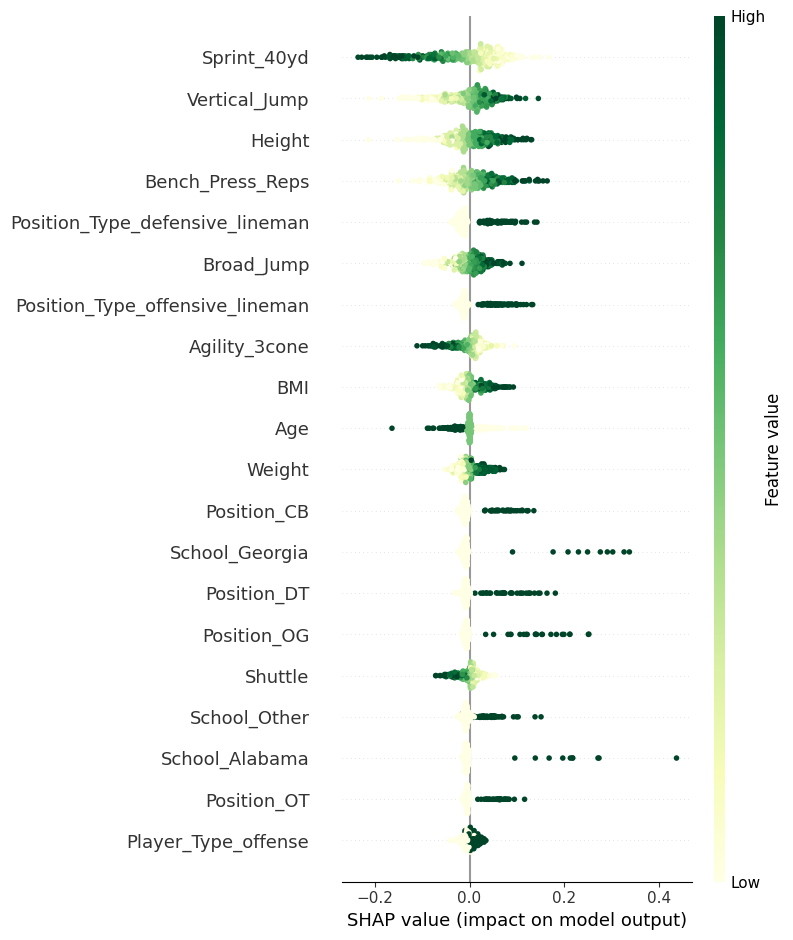

In [31]:
# Code generated from Chat GPT (January 2025)
import shap

# Ensure X_test_scaled has the feature names
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Reinitialize SHAP explainer with the updated DataFrame
explainer = shap.Explainer(nn, X_test_scaled)

# Calculate SHAP values again
shap_values = explainer(X_test_scaled)


# Generate the SHAP summary plot with the 'YlGn' colormap
shap.summary_plot(shap_values, X_test_scaled, cmap='YlGn', show=False)

# Save the plot
plt.savefig('shap_summary_YlGn.png', dpi=300, bbox_inches='tight')

plt.show()


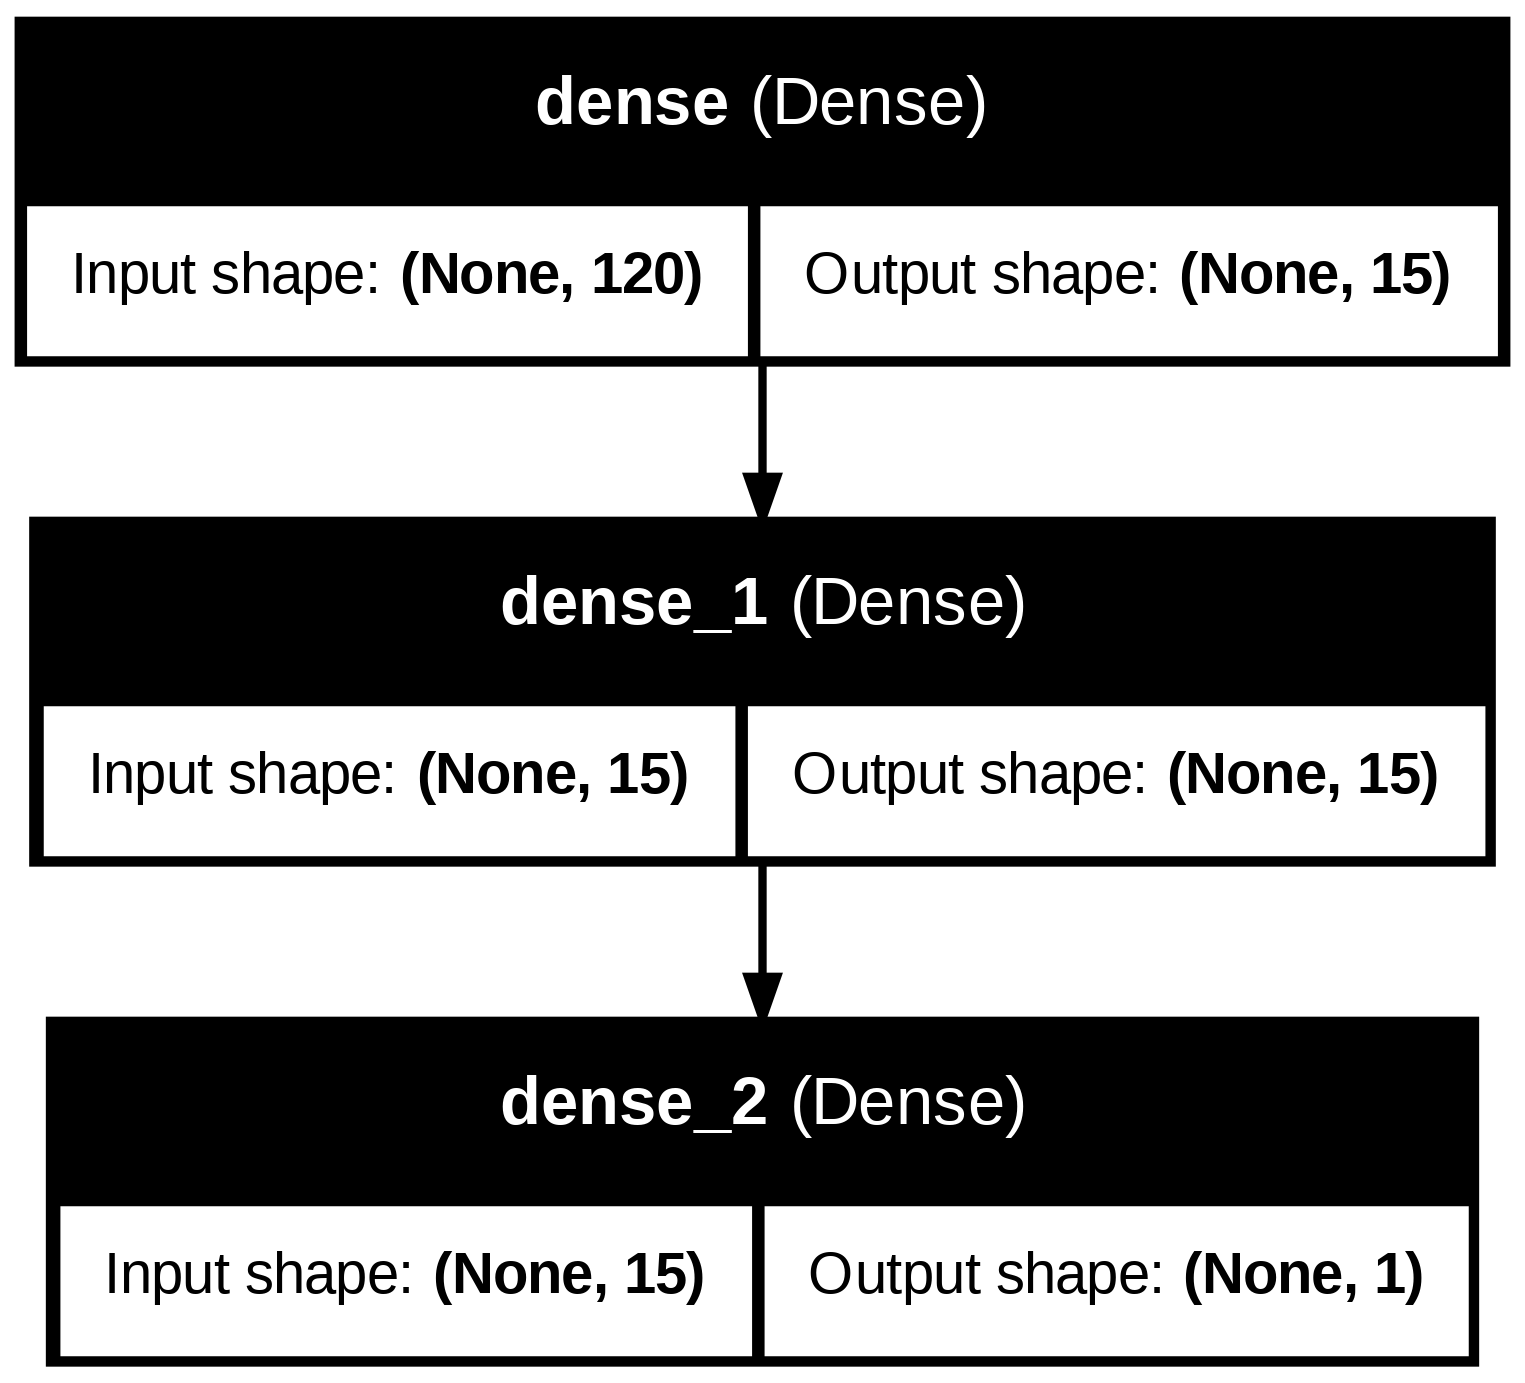

In [32]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as an image
plot_model(nn, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=300)

# Display the image
from IPython.display import Image
Image('model_architecture.png')

